In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp-500-stocks/sp500_stocks.csv
/kaggle/input/sp-500-stocks/sp500_companies.csv
/kaggle/input/sp-500-stocks/sp500_index.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **LOADING DATA**

In [3]:
df=pd.read_csv('/kaggle/input/sp-500-stocks/sp500_companies.csv')
df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,416.420,3094183936000,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.065279
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,172.620,2665580593152,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.056237
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,878.365,2195912523776,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.046328
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,174.420,1811770245120,8.551500e+10,0.139,Seattle,WA,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",0.038224
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,141.180,1761912160256,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.037172


# **DATA CLEANING**

In [4]:
df.isna().sum()

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           1
City                    0
State                  20
Country                 0
Fulltimeemployees      11
Longbusinesssummary     0
Weight                  0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isna().sum()

Exchange               0
Symbol                 0
Shortname              0
Longname               0
Sector                 0
Industry               0
Currentprice           0
Marketcap              0
Ebitda                 0
Revenuegrowth          0
City                   0
State                  0
Country                0
Fulltimeemployees      0
Longbusinesssummary    0
Weight                 0
dtype: int64

## Group the data by industry and sector

In [7]:

industry_groups = df.groupby(['Industry', 'Sector'])

## Calculating aggregate statistics for each group

In [8]:

aggregate_stats = industry_groups.agg({
    'Marketcap': 'mean',  # Mean market capitalization
    'Ebitda': 'median',   # Median EBITDA
    'Revenuegrowth': 'mean'  # Mean revenue growth
})

## Resetting index to make the groups as columns

In [9]:

aggregate_stats.reset_index(inplace=True)

## Selecting top 10 industries based on mean market capitalization

In [10]:

top_industries = aggregate_stats.nlargest(10, 'Marketcap')['Industry']

## Filtering the DataFrame to include only the top 10 industries

In [11]:

top_industries_data = df[df['Industry'].isin(top_industries)]

# DATA VISUALIZATION

## Visualization 1: Bar chart showing mean market capitalization by industry for the top 10 industries

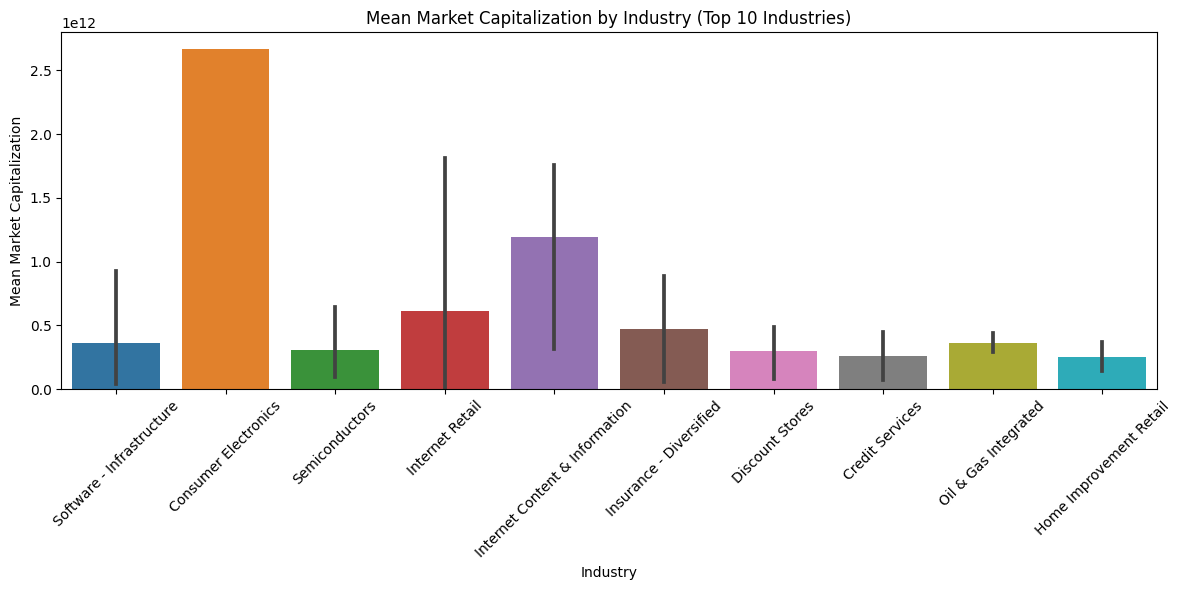

In [12]:

plt.figure(figsize=(12, 6))
sns.barplot(data=top_industries_data, x='Industry', y='Marketcap')
plt.xticks(rotation=45)
plt.title('Mean Market Capitalization by Industry (Top 10 Industries)')
plt.xlabel('Industry')
plt.ylabel('Mean Market Capitalization')
plt.tight_layout()
plt.show()

 **Insight:** **Software/Infrastructure** stands out as the industry with the highest mean market capitalization, indicating its significant valuation and market attractiveness within the dataset. 

## Visualization 2: Box plot showing distribution of EBITDA by sector for the top 10 industries

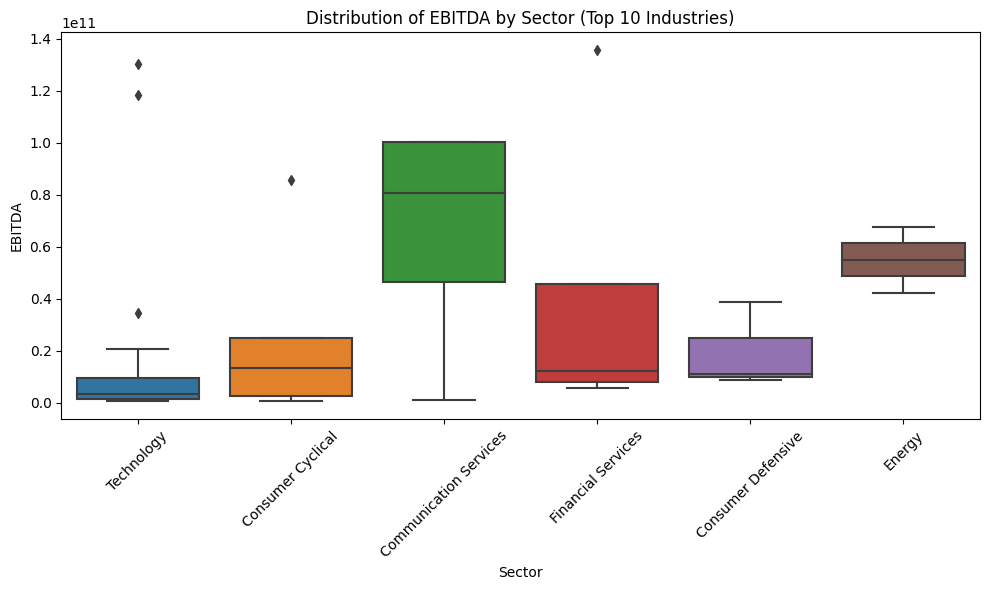

In [13]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=top_industries_data, x='Sector', y='Ebitda')
plt.title('Distribution of EBITDA by Sector (Top 10 Industries)')
plt.xlabel('Sector')
plt.ylabel('EBITDA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight: Technology** emerges as the sector with the highest EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization), underscoring its financial strength and profitability within the dataset.

## Visualization 3: Scatter plot showing relationship between revenue growth and market capitalization for the top 10 industries

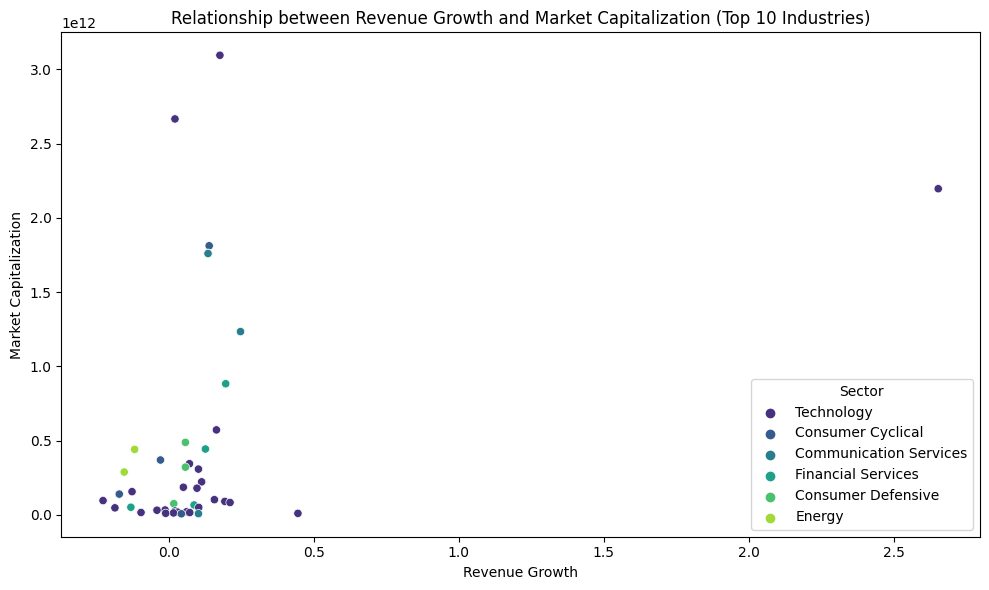

In [14]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_industries_data, x='Revenuegrowth', y='Marketcap', hue='Sector', palette='viridis')
plt.title('Relationship between Revenue Growth and Market Capitalization (Top 10 Industries)')
plt.xlabel('Revenue Growth')
plt.ylabel('Market Capitalization')
plt.tight_layout()
plt.show()

**Insight:** The observed relationship between market capitalization and revenue growth within the Technology sector suggests a correlation between financial performance and investor valuation. 

## Visualization 4: Histogram of Market Capitalization by Industry for the top 10 industries

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

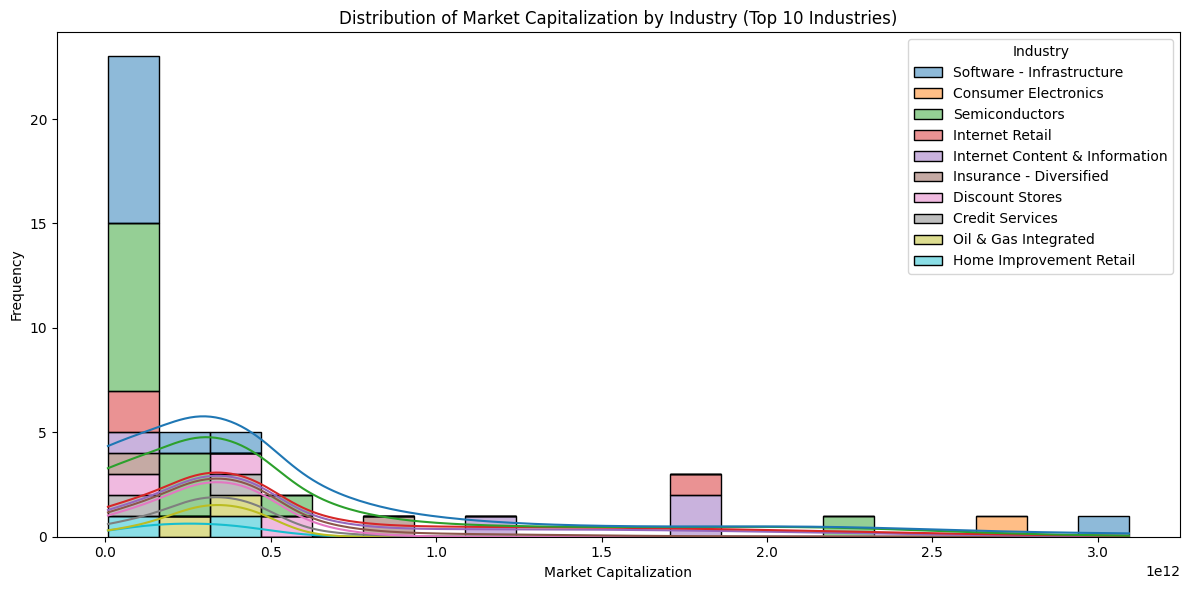

In [15]:

plt.figure(figsize=(12, 6))
sns.histplot(data=top_industries_data, x='Marketcap', hue='Industry', kde=True, multiple='stack', bins=20)
plt.title('Distribution of Market Capitalization by Industry (Top 10 Industries)')
plt.xlabel('Market Capitalization')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Insight: Software Infrastructure** emerges as the industry with the highest market capitalization, underscoring its significance and market value within the dataset.

## Visualization 5: Box plot of Revenue Growth by Industry for the top 10 industries

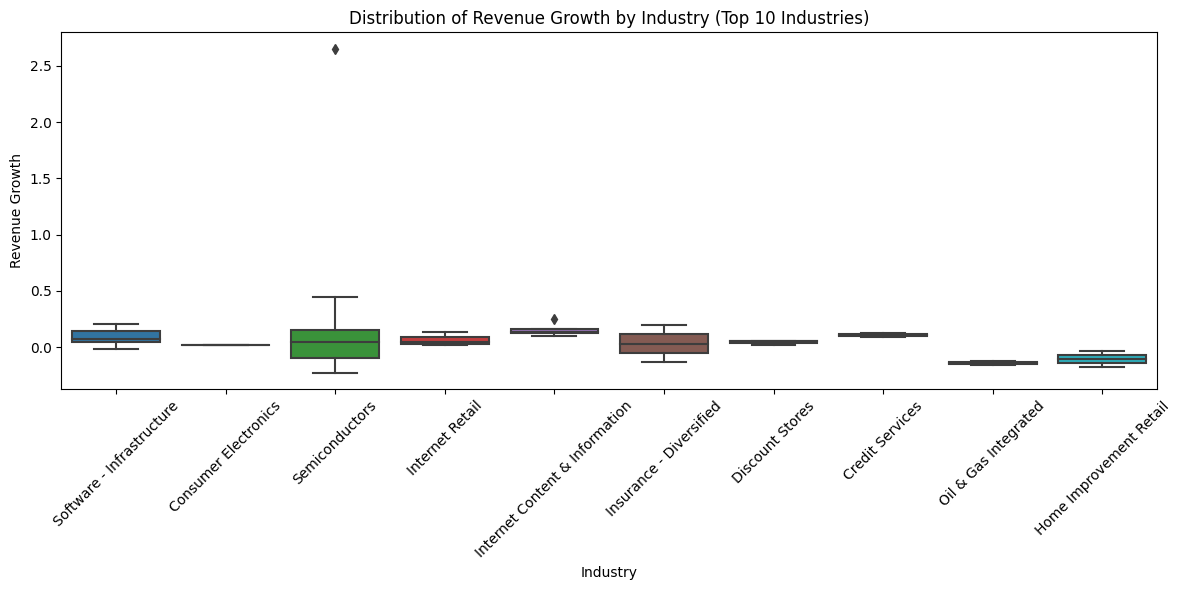

In [16]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_industries_data, x='Industry', y='Revenuegrowth')
plt.title('Distribution of Revenue Growth by Industry (Top 10 Industries)')
plt.xlabel('Industry')
plt.ylabel('Revenue Growth')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight: Software Infrastructure** emerges as the industry with the highest revenue growth, showcasing its resilience and potential for expansion within the dataset.

## Visualization 6: Bar plot of Company Count by Industry and Sector for the top 10 industries

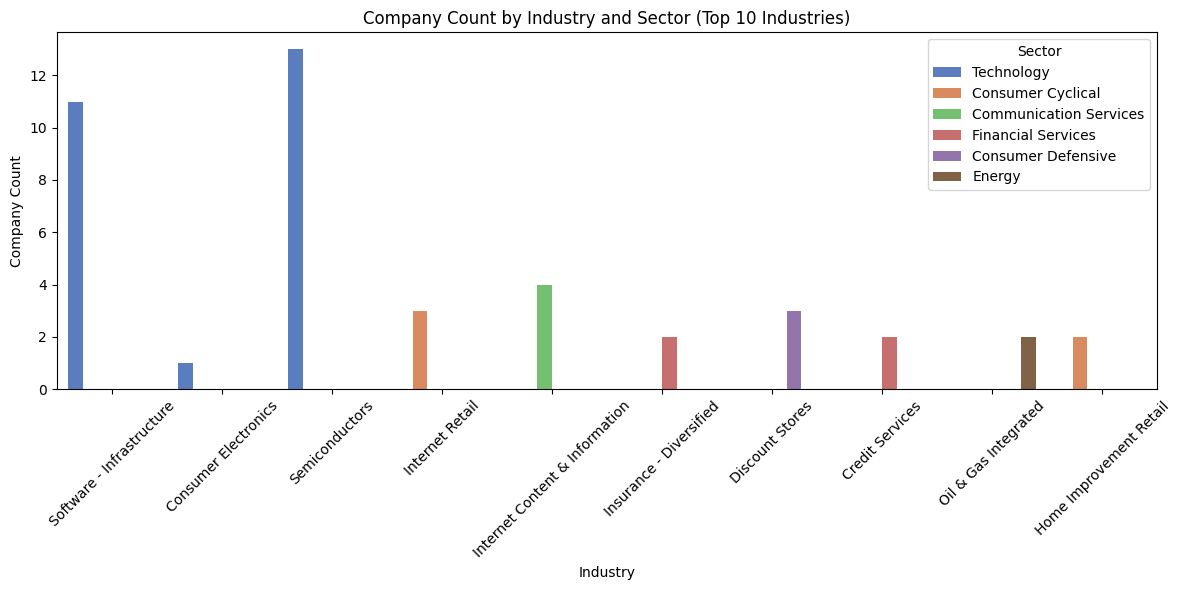

In [17]:

plt.figure(figsize=(12, 6))
sns.countplot(data=top_industries_data, x='Industry', hue='Sector', palette='muted')
plt.title('Company Count by Industry and Sector (Top 10 Industries)')
plt.xlabel('Industry')
plt.ylabel('Company Count')
plt.xticks(rotation=45)
plt.legend(title='Sector', loc='upper right')
plt.tight_layout()
plt.show()

**Insight: Technology** stands out as the sector with the highest company count, highlighting its dominance within the dataset and emphasizing its role as a key driver of innovation, growth, and competitiveness in the modern economy.

## Plotting the distribution of long names

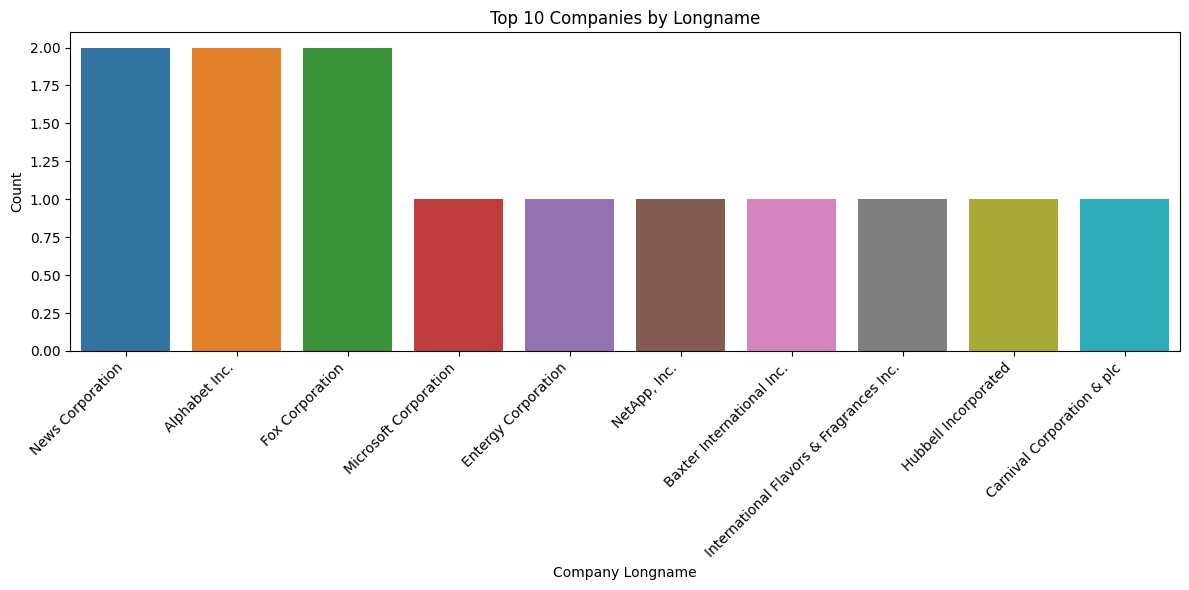

In [18]:
# Count the occurrences of each unique long name
longname_counts = df['Longname'].value_counts()


plt.figure(figsize=(12, 6))
sns.barplot(x=longname_counts.index[:10], y=longname_counts.values[:10])
plt.title('Top 10 Companies by Longname')
plt.xlabel('Company Longname')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight: News Corporation** emerges as the company with the highest count, suggesting its prominence within the dataset, potentially reflecting its extensive portfolio of media assets, global reach, and diversified operations spanning publishing, broadcasting, and digital media

##  Pie Chart of Sectors

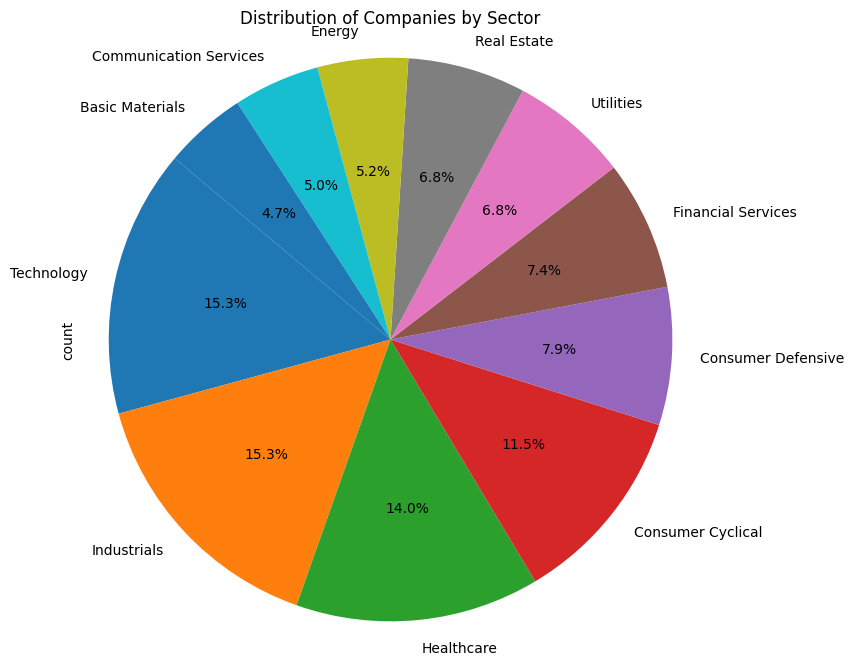

In [19]:

plt.figure(figsize=(8, 8))
df['Sector'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Companies by Sector')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Insight: Industrials** stand out with the highest distribution of companies, underscoring the sector's significance within the dataset, potentially indicative of diverse industrial activities, manufacturing prowess, and infrastructure development

##  Box Plot of Market Capitalization by Sector

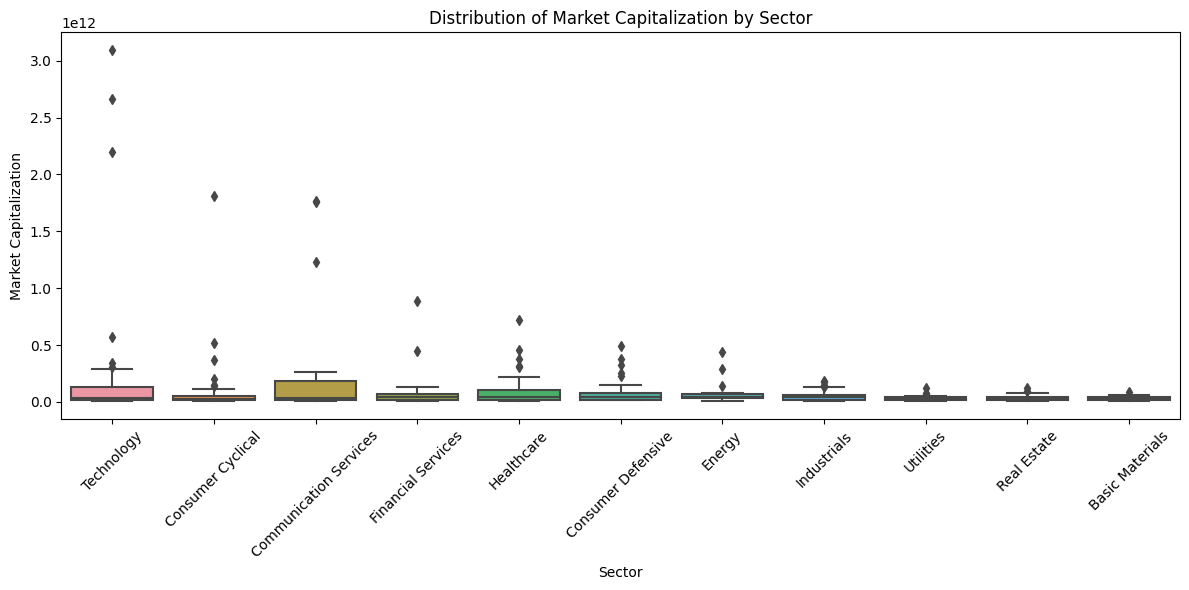

In [20]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sector', y='Marketcap')
plt.title('Distribution of Market Capitalization by Sector')
plt.xlabel('Sector')
plt.ylabel('Market Capitalization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight: Technology** emerges as the sector with the highest market capitalization, reflecting the sector's robust performance and investor confidence, likely driven by innovation, digital transformation, and sustained demand for tech products and services in the evolving global economy.

##  Histogram of Revenue Growth

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


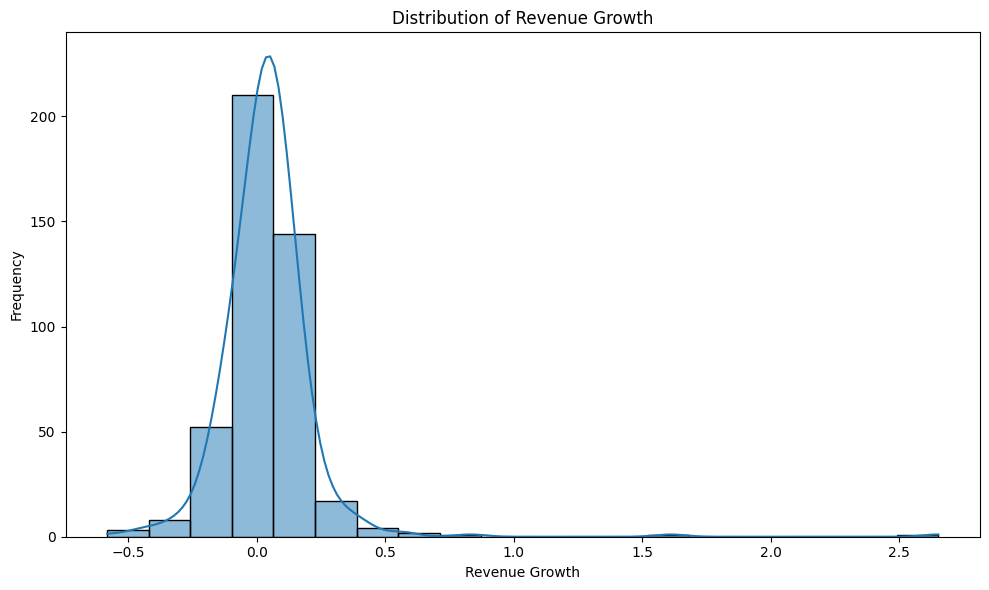

In [21]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Revenuegrowth', kde=True, bins=20)
plt.title('Distribution of Revenue Growth')
plt.xlabel('Revenue Growth')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The histogram of revenue growth distribution highlights a peak frequency around the range of -0.5 to 0.5, indicating that a significant portion of companies experienced modest fluctuations in revenue over the observed period.

# CONCLUSION

In summary, the analysis underscores the dominance of the Technology sector, characterized by high market capitalization and EBITDA performance. Industries like Software/Infrastructure and Industrials also exhibit significant market presence and value. The observed relationships between market capitalization, revenue growth, and sector performance emphasize the importance of innovation and operational excellence in driving long-term value creation. These insights provide valuable guidance for stakeholders aiming to navigate and capitalize on opportunities in today's dynamic market landscape.